In [13]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from scipy import sparse
import re
import networkx as nx
import string
import matplotlib.pyplot as plt

In [15]:
TopicA = "'Professor' a Mohammad Hafeez ends 2020 with most T20I runs"
TopicB = "Pakistan takes the steps in light of new Covid virus strain detected in UK"
TopicC = 'Hafeez silences critics by ending 2020 as top run-scorer in T20 internationals'



In [16]:
# Convert the text to lowercase
listT = [TopicA,TopicB,TopicC]
listT = [x.lower() for x in listT]
print(listT)

["'professor' a mohammad hafeez ends 2020 with most t20i runs", 'pakistan takes the steps in light of new covid virus strain detected in uk', 'hafeez silences critics by ending 2020 as top run-scorer in t20 internationals']


In [17]:
# Remove the Numbers
count=0
for x in listT:
   listT[count] = re.sub(r'\d+', '', x)
   count+=1
print(listT)

["'professor' a mohammad hafeez ends  with most ti runs", 'pakistan takes the steps in light of new covid virus strain detected in uk', 'hafeez silences critics by ending  as top run-scorer in t internationals']


In [18]:
# remove punctuations
listT = [''.join(c for c in s if c not in string.punctuation) for s in listT]

print(listT)


['professor a mohammad hafeez ends  with most ti runs', 'pakistan takes the steps in light of new covid virus strain detected in uk', 'hafeez silences critics by ending  as top runscorer in t internationals']


In [19]:
# Remove whitespaces
listT = [x.strip(' ') for x in listT]
print(listT)

['professor a mohammad hafeez ends  with most ti runs', 'pakistan takes the steps in light of new covid virus strain detected in uk', 'hafeez silences critics by ending  as top runscorer in t internationals']


In [20]:
# Removal of stopwords
#en_stops = set(stopwords.words('english'))
#print(en_stops)


for count,ele in enumerate(listT): 
  text_tokens = word_tokenize(ele)
  tokeniz_list = [word for word in text_tokens if not word in stopwords.words()]
  sentence = (" ").join(tokeniz_list)
  listT[count] = sentence
  
print(listT)



['professor mohammad hafeez ends runs', 'pakistan takes steps light new covid virus strain detected uk', 'hafeez silences critics ending top runscorer internationals']


In [21]:
# Lemmatization
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer= PorterStemmer()

count =0
for line in listT:
  x = ""
  line=word_tokenize(line)
  for word in line:
      x = x+" " + str(stemmer.stem(word))
  listT[count] = x
  count +=1

print(listT)

[' professor mohammad hafeez end run', ' pakistan take step light new covid viru strain detect uk', ' hafeez silenc critic end top runscor intern']


In [22]:
def AggregationRank(sentences, s):
  vectorizer = TfidfVectorizer()
  vectors = vectorizer.fit_transform(sentences)
  feature_names = vectorizer.get_feature_names()
  dense = vectors.todense()
  denselist = dense.tolist()
  df = pd.DataFrame(denselist, columns=feature_names)
  print("TF-IDF:")
  print(df)

  array = df.to_numpy()
  A_sparse = sparse.csr_matrix(array)
  cosineSimilaritiesSparse = cosine_similarity(A_sparse)
  cosineSimilarities = cosine_similarity(A_sparse,dense_output=False)
  print('Cosine Similary:\n {}\n'.format(cosineSimilarities))

  #replace 1 with 0
  sim = cosineSimilarities.toarray()
  sim[sim == 1] = 0

  print('Similariy Matrix:\n {}\n'.format(sim))

  # rank = pageRank(cosineSimilarities.toarray(),s)
  G = nx.from_numpy_array(sim)
  rank = nx.pagerank_numpy(G, alpha=s)

  G = nx.from_numpy_array(sim)
  pos = nx.spring_layout(G)
  nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 500)
  nx.draw_networkx_labels(G, pos)
  nx.draw_networkx_edges(G, pos, edge_color='r', arrows=True)
  nx.draw_networkx_edges(G, pos, arrows=False)
  plt.show()

  print("Page rank:")
  print(rank)
  return rank;

TF-IDF:
      covid    critic    detect  ...       top        uk      viru
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
1  0.316228  0.000000  0.316228  ...  0.000000  0.316228  0.316228
2  0.000000  0.403016  0.000000  ...  0.403016  0.000000  0.000000

[3 rows x 20 columns]
Cosine Similary:
   (0, 2)	0.22866562283345077
  (0, 0)	1.0
  (1, 1)	1.0000000000000007
  (2, 0)	0.22866562283345077
  (2, 2)	1.0000000000000002

Similariy Matrix:
 [[0.         0.         0.22866562]
 [0.         1.         0.        ]
 [0.22866562 0.         1.        ]]



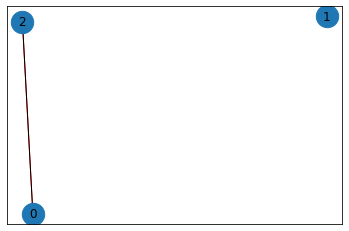

Page rank:
{0: 0.2562480993002129, 1: 0.33333333333333326, 2: 0.4104185673664538}


In [24]:
#doc = "According to Zameen Trends for buying apartments in Rawalpindi, Bahria Town has been the most sought-out place for buyers. If we look at the trends within Bahria, Bahria Town Phases 8, 7 and 4 saw the most interest from buyers in November. The society’s popularity is also due to its central location which is easily accessible from Islamabad Expressway, Faisal Avenue, and GT Road, including Phase 2, CBR Town, Phase 2, DHA, Soan Garden, Pakistan Town, and Gulistan Colony. According to Zameen.com’s data, the search volume for Bahria Town Rawalpindi apartments increased by 118% between 2018 and 2020; the highest rise observed among all property types in the society.. During this period, search volume for commercial units rose by 95%, while that for houses stood at 70%. With an increasing demand for apartments comes higher prospects for rental yield. Investing in an apartment at Bahria Town Rawalpindi guarantees solid rental yield, while the value of your property will continue to rise as well. Zameen.com’s data says that the average per square foot price of an apartment in Bahria Town Rawalpindi increased by 33% in the last three years, whereas prices of houses here remained mostly stable during this period."
#doc = doc.replace(",",".")
#sentences = doc.split(".")

s = 0.3
rank = AggregationRank( listT, s)

threshold = rank.mean()
#res = 0
#for val in rank.values(): 
#    res += val 
#threshold = res/len(rank)
#summary = ""

#for i, key in enumerate(rank):
#  if (rank[key] > threshold):
#    summary = summary + str(sentences[i]) + ".\n"
